In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
#extract a shareable link from google drive where the cleaned dataset resides
#original google drive link - https://drive.google.com/file/d/19C6RISwVpnc-hCVWNhvd0PyLCBgDKsG5/view?usp=sharing
#change the format of the link by noting the ID and assign it to a variable link

data = 'https://drive.google.com/uc?id=19C6RISwVpnc-hCVWNhvd0PyLCBgDKsG5'

In [3]:
upsampled = pd.read_csv(data)

In [4]:
upsampled.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0


In [5]:
X = upsampled.drop('Machine_failure', axis=1)
y = upsampled['Machine_failure']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV with Pipeline for Lasso Regression


In [7]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [8]:
search = GridSearchCV(pipeline,
                      {'model__alpha': np.arange(0.1,10,0.1)},
                      cv = 5,verbose=3
                      )

In [9]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..................model__alpha=0.1;, score=0.625 total time=   0.1s
[CV 2/5] END ..................model__alpha=0.1;, score=0.623 total time=   0.1s
[CV 3/5] END ..................model__alpha=0.1;, score=0.624 total time=   0.1s
[CV 4/5] END ..................model__alpha=0.1;, score=0.625 total time=   0.1s
[CV 5/5] END ..................model__alpha=0.1;, score=0.632 total time=   0.1s
[CV 1/5] END ..................model__alpha=0.2;, score=0.075 total time=   0.1s
[CV 2/5] END ..................model__alpha=0.2;, score=0.073 total time=   0.1s
[CV 3/5] END ..................model__alpha=0.2;, score=0.072 total time=   0.1s
[CV 4/5] END ..................model__alpha=0.2;, score=0.074 total time=   0.1s
[CV 5/5] END ..................model__alpha=0.2;, score=0.073 total time=   0.1s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.000 total time=   0.1s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             verbose=3)

In [10]:
search.best_params_

{'model__alpha': 0.1}

In [11]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [12]:
importance = np.abs(coefficients)
print(importance)
print(len(importance))

[0.         0.         0.         0.         0.         0.
 0.07578984 0.17343405 0.13925595 0.13113681 0.        ]
11


In [13]:
features = upsampled.columns
if len(importance) < len(features):
    # If there are more features than coefficients, trim the features array
    features = features[:len(importance)]
elif len(importance) > len(features):
    # If there are more coefficients than features, pad the features array
    features = np.pad(features, (0, len(importance) - len(features)), mode='constant', constant_values='')

# Select features with non-zero coefficients
features_lasso = np.array(features)[importance != 0]
print(len(features))
# Print the selected features
print(features_lasso)

11
['Machine_failure' 'TWF' 'HDF' 'PWF']


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
alpha = 0.1  # Adjust this value for the strength of the regularization
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [16]:
y_pred = lasso_model.predict(X_test_scaled)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
lasso_coefficients = lasso_model.coef_

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Lasso Coefficients: {lasso_coefficients}')

Mean Squared Error: 0.09342469034774105
Lasso Coefficients: [-0.          0.          0.         -0.          0.          0.
  0.07578984  0.17343405  0.13925595  0.13113681  0.        ]


The Lasso regression model demonstrates a satisfactory fit to the data, with a Mean Squared Error (MSE) of approximately 0.0934.

The model has identified a subset of features with non-zero coefficients, indicating their importance in predicting 'Machine failure.'

# Random Forest Classifier with Lasso Feature Selection

In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [19]:
X_best = upsampled[features_lasso]

In [20]:
X_best

,Machine_failure,TWF,HDF,PWF
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
19317,1,0,0,0
19318,1,0,1,0
19319,1,1,0,0
19320,1,1,0,0


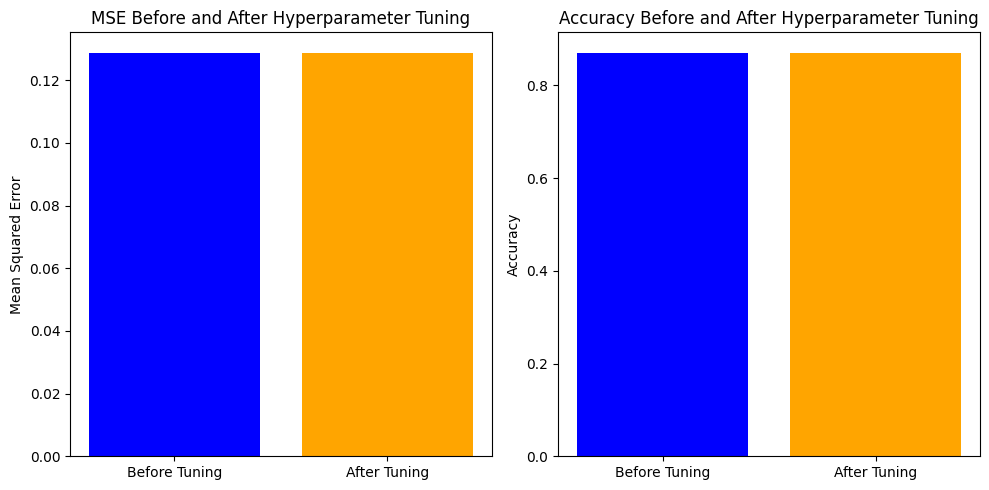

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
target_variable = 'Machine_failure'

# Exclude the target variable from the features
lasso_features = [feature for feature in features_lasso if feature != target_variable]
# Assuming 'lasso_features' contains the features selected by Lasso
X_train_lasso = X_train[lasso_features]
X_test_lasso = X_test[lasso_features]

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier with training data
rf_classifier.fit(X_train_lasso, y_train)

# Choose RandomizedSearchCV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_random_search.fit(X_train_lasso, y_train)

# Get the best model
rf_best_classifier = rf_random_search.best_estimator_

# Predict using the trained model before hyperparameter tuning
rf_pred_before = rf_classifier.predict(X_test_lasso)
mse_before = mean_squared_error(y_test, rf_pred_before)
accuracy_before = accuracy_score(y_test, rf_pred_before)

# Predict using the best model after hyperparameter tuning
rf_pred_after = rf_best_classifier.predict(X_test_lasso)
mse_after = mean_squared_error(y_test, rf_pred_after)
accuracy_after = accuracy_score(y_test, rf_pred_after)

# Visualize MSE and accuracy before and after hyperparameter tuning
plt.figure(figsize=(10, 5))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(['Before Tuning', 'After Tuning'], [mse_before, mse_after], color=['blue', 'orange'])
plt.title('MSE Before and After Hyperparameter Tuning')
plt.ylabel('Mean Squared Error')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.bar(['Before Tuning', 'After Tuning'], [accuracy_before, accuracy_after], color=['blue', 'orange'])
plt.title('Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [22]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [23]:
from sklearn.svm import SVC
# Create SVM classifier
svm_classifier = SVC(random_state=42)

# Choose GridSearchCV for hyperparameter tuning
svm_grid_search = GridSearchCV(svm_classifier, param_grid=param_grid, cv=7, scoring='accuracy')
svm_grid_search.fit(X_train_lasso, y_train)

GridSearchCV(cv=7, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [24]:
# Get the best model
svm_best_classifier = svm_grid_search.best_estimator_

# Fit the best SVM model with the training data
svm_best_classifier.fit(X_train_lasso, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [25]:
# Predict using the trained SVM model before hyperparameter tuning
svm_pred_before = svm_best_classifier.predict(X_test_lasso)
mse_before_svm = mean_squared_error(y_test, svm_pred_before)
accuracy_before_svm = accuracy_score(y_test, svm_pred_before)

# Predict using the best SVM model after hyperparameter tuning
svm_pred_after = svm_best_classifier.predict(X_test_lasso)
mse_after_svm = mean_squared_error(y_test, svm_pred_after)
accuracy_after_svm = accuracy_score(y_test, svm_pred_after)

Text(0, 0.5, 'Mean Squared Error')

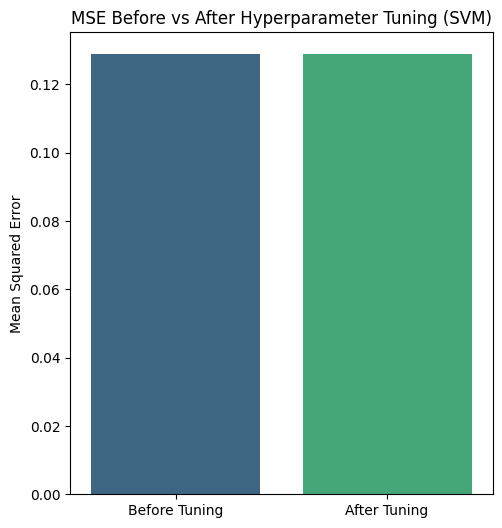

In [26]:
# Visualize MSE and accuracy before and after hyperparameter tuning for SVM
plt.figure(figsize=(12, 6))

# MSE Before vs After
plt.subplot(1, 2, 1)
sns.barplot(x=['Before Tuning', 'After Tuning'], y=[mse_before_svm, mse_after_svm], palette='viridis')
plt.title('MSE Before vs After Hyperparameter Tuning (SVM)')
plt.ylabel('Mean Squared Error')

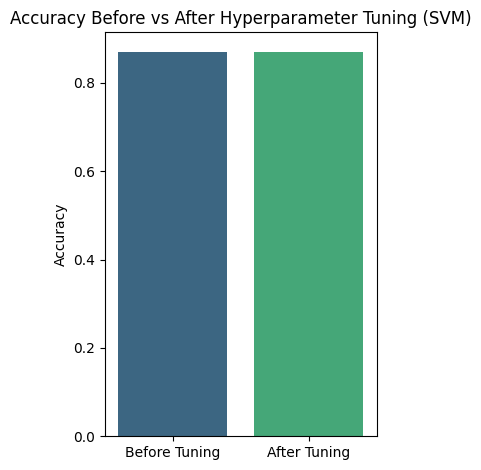

In [27]:
# Accuracy Before vs After
plt.subplot(1, 2, 2)
sns.barplot(x=['Before Tuning', 'After Tuning'], y=[accuracy_before_svm, accuracy_after_svm], palette='viridis')
plt.title('Accuracy Before vs After Hyperparameter Tuning (SVM)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [28]:
print(f"Accuracy Before Tuning (SVM): {accuracy_before_svm:.4f}")
print(f"MSE Before Tuning (SVM): {mse_before_svm:.4f}\n")

print(f"Accuracy After Tuning (SVM): {accuracy_after_svm:.4f}")
print(f"MSE After Tuning (SVM): {mse_after_svm:.4f}")

Accuracy Before Tuning (SVM): 0.8712
MSE Before Tuning (SVM): 0.1288

Accuracy After Tuning (SVM): 0.8712
MSE After Tuning (SVM): 0.1288


It seems that the hyperparameter tuning didn't significantly impact the performance of the SVM model on our dataset, as the accuracy and mean squared error (MSE) values are very close before and after tuning.